## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.203281  , 0.4893737 , 0.81240132],
       [0.05217039, 0.39059217, 0.88051152],
       [0.84900348, 0.07487192, 0.64386342],
       [0.28547232, 0.47957124, 0.90286943],
       [0.90959078, 0.53942814, 0.23710834]])

In [3]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [4]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.203281   5.4893737  5.81240132]
 [5.05217039 5.39059217 5.88051152]
 [5.84900348 5.07487192 5.64386342]
 [5.28547232 5.47957124 5.90286943]
 [5.90959078 5.53942814 5.23710834]]


In [5]:
print(f"Посчитали произведение X X^T:\n{a @ a.T}")

Посчитали произведение X X^T:
[[0.9408057  0.91707951 0.73230212 1.02621297 0.6415116 ]
 [0.91707951 0.93058454 0.64046639 0.99719691 0.46692674]
 [0.73230212 0.64046639 1.14097281 0.85959801 0.96529914]
 [1.02621297 0.99719691 0.85959801 1.12665622 0.73243508]
 [0.6415116  0.46692674 0.96529914 0.73243508 1.17455846]]


In [6]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")
# columns = -1
# rows = 0

Среднее по колонкам:
[0.50168534 0.44109136 0.52257961 0.555971   0.56204242]


In [7]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [8]:
# YOUR CODE
print("Answer =", np.sum(np.arange(1,10001)**2))

Answer = -1624114088


Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [18]:
x = torch.rand(5, 3)
x

tensor([[0.7929, 0.5848, 0.2657],
        [0.6281, 0.7468, 0.1351],
        [0.9275, 0.3240, 0.0881],
        [0.9303, 0.9216, 0.2951],
        [0.5707, 0.8063, 0.8633]])

In [19]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [20]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.7929, 5.5848, 5.2657],
        [5.6281, 5.7468, 5.1351],
        [5.9275, 5.3240, 5.0881],
        [5.9303, 5.9216, 5.2951],
        [5.5707, 5.8063, 5.8633]])


In [21]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[1.0413, 0.9707, 0.9483, 1.3550, 1.1534],
        [0.9707, 0.9705, 0.8364, 1.3124, 1.0773],
        [0.9483, 0.8364, 0.9729, 1.1874, 0.8666],
        [1.3550, 1.3124, 1.1874, 1.8018, 1.5288],
        [1.1534, 1.0773, 0.8666, 1.5288, 1.7210]])

X X^T  (2):
tensor([[1.0413, 0.9707, 0.9483, 1.3550, 1.1534],
        [0.9707, 0.9705, 0.8364, 1.3124, 1.0773],
        [0.9483, 0.8364, 0.9729, 1.1874, 0.8666],
        [1.3550, 1.3124, 1.1874, 1.8018, 1.5288],
        [1.1534, 1.0773, 0.8666, 1.5288, 1.7210]])


In [22]:
print(torch.rand(2, 3, 4).shape)
print(torch.rand(2, 3, 4).transpose(0, 2).shape)

torch.Size([2, 3, 4])
torch.Size([4, 3, 2])


In [23]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}") # (-1) - columns, 0 - rows.

Среднее по колонкам:
tensor([0.5478, 0.5034, 0.4465, 0.7157, 0.7467])


In [24]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n")

# будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")

# хуйня
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [25]:
# YOUR CODE
print("Answer =", torch.sum(torch.arange(1,10001)**2).item())

Answer = 333383335000


Число тоже тензор


### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [26]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[ 9.6800e+02,  2.5353e+30,  2.1860e-43],
        [ 4.2889e+24,  1.6962e+19,  1.8617e+25],
        [-3.2081e-21, -9.0072e+15,  6.8589e+22],
        [ 1.0804e+27,  3.0357e+32,  2.5983e+21],
        [ 2.7491e+26,  4.8418e+30, -1.6142e+16]])


In [27]:
x = torch.rand(5, 3)  # случайный тензор
print(x)

tensor([[0.5833, 0.1929, 0.6675],
        [0.7086, 0.1795, 0.3293],
        [0.5145, 0.3307, 0.0978],
        [0.1963, 0.2796, 0.1973],
        [0.5511, 0.0160, 0.0595]])


In [28]:
x = torch.zeros(5, 3, dtype=torch.float32)  # тензор с нулями и указанием типов чисел
print(x.dtype)
x = torch.zeros(5, 3)
print(x.dtype)

torch.float32
torch.float32


In [29]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [30]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x1, x1.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [31]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами x
print(x, x.size())

tensor([[ 0.4753,  1.0071,  1.3910],
        [ 0.1450, -1.2123, -0.2763],
        [ 0.3841, -0.2005,  1.3986],
        [-0.3024, -0.9536,  0.3634],
        [ 0.7880, -0.6991, -0.5577]]) torch.Size([5, 3])


In [32]:
y = torch.rand(5, 3)
print(x + y)  # операция сложения

tensor([[ 0.8882,  1.4397,  1.4534],
        [ 0.5079, -0.5035,  0.5438],
        [ 0.6901,  0.0419,  1.6979],
        [-0.2350, -0.7002,  0.6994],
        [ 1.2106,  0.1435,  0.0550]])


In [33]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[ 0.8882,  1.4397,  1.4534],
        [ 0.5079, -0.5035,  0.5438],
        [ 0.6901,  0.0419,  1.6979],
        [-0.2350, -0.7002,  0.6994],
        [ 1.2106,  0.1435,  0.0550]])


In [34]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[ 0.8882,  1.4397,  1.4534],
        [ 0.5079, -0.5035,  0.5438],
        [ 0.6901,  0.0419,  1.6979],
        [-0.2350, -0.7002,  0.6994],
        [ 1.2106,  0.1435,  0.0550]])


In [35]:
print(x * y)  # поэлементное умножение

tensor([[ 0.1963,  0.4357,  0.0868],
        [ 0.0526, -0.8593, -0.2266],
        [ 0.1175, -0.0486,  0.4187],
        [-0.0204, -0.2417,  0.1221],
        [ 0.3330, -0.5892, -0.3417]])


In [36]:
print(x @ y.t())  # матричное умножение

tensor([[ 0.7188,  2.0271,  0.8060,  0.7546,  1.9018],
        [-0.4818, -1.0333, -0.3323, -0.3903, -1.1296],
        [ 0.1592,  1.1443,  0.4876,  0.4450,  0.8503],
        [-0.5148, -0.4876, -0.2149, -0.1399, -0.7088],
        [-0.0118, -0.6670, -0.0954, -0.3115, -0.5978]])


In [37]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[ 0.7188,  2.0271,  0.8060,  0.7546,  1.9018],
        [-0.4818, -1.0333, -0.3323, -0.3903, -1.1296],
        [ 0.1592,  1.1443,  0.4876,  0.4450,  0.8503],
        [-0.5148, -0.4876, -0.2149, -0.1399, -0.7088],
        [-0.0118, -0.6670, -0.0954, -0.3115, -0.5978]])


In [38]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [39]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  # убрали измерение в начале

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [40]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

C:\Users\nikita\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

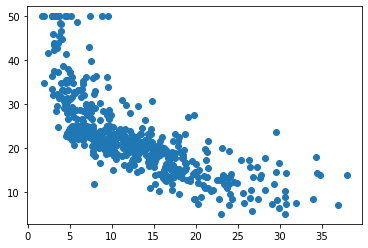

In [41]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

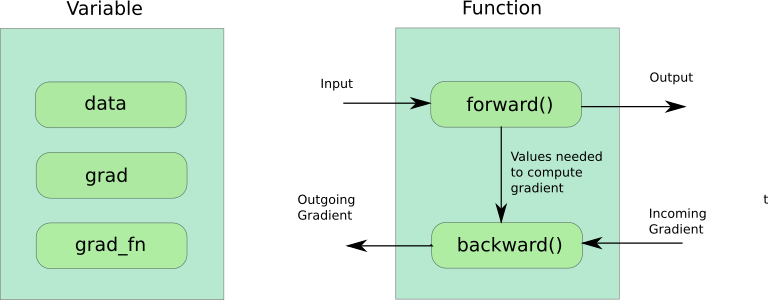

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [42]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [43]:
y_pred = w * x + b                    # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами MSE
loss.backward()                       # считаем градиенты

In [44]:
# сделали операции и посчитали градиенты, значение должно было появится
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-11.7883])
dL/db = 
 tensor([-43.1945])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [45]:
w.data

tensor([0.8347])

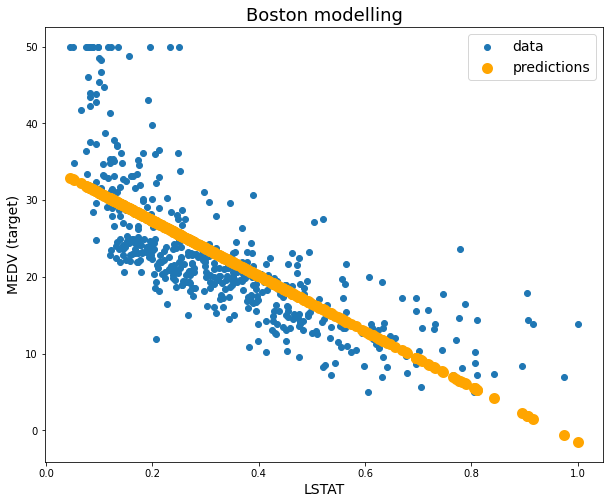

loss =  38.482967


In [46]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward() # for w in weights: w.grad += current_grad(loss_w)

    # делаем шаг градиентного спуска с lr = .05
    lr = .5
    w.data -=  lr * w.grad# YOUR CODE
    b.data -=  lr * b.grad# YOUR CODE

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [47]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [48]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [49]:
our_dataset = RandomDataset(x, y)

In [50]:
our_dataset.__getitem__(1)

{'sample': tensor([0.7312, 0.2157, 0.4562, 0.0349, 0.7113]),
 'target': 0.12760119353601107}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [51]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [52]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.5369, 0.7115, 0.2144, 0.6809, 0.4139],
        [0.7312, 0.2157, 0.4562, 0.0349, 0.7113],
        [0.0138, 0.6553, 0.7134, 0.7749, 0.1951],
        [0.3491, 0.8273, 0.1630, 0.7517, 0.7801]])
Target:
tensor([0.8597, 0.1276, 0.9986, 0.6415], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [54]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 3))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(3, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход
# сверху неверный способ создания нейросетки

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

In [56]:
y_pred = another_model(batch['sample']) # получили предсказания модели
y_pred

tensor([[-0.2546],
        [-0.3384],
        [-0.3698],
        [-0.3010]], grad_fn=<AddmmBackward0>)

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [57]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



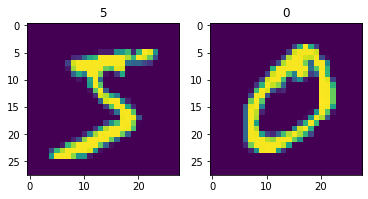

In [58]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [59]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
    nn.Softmax(dim=-1)
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [60]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[ 0.0310, -0.0039,  0.0292,  ..., -0.0035,  0.0231, -0.0348],
          [-0.0334,  0.0135, -0.0042,  ...,  0.0122, -0.0326,  0.0128],
          [-0.0011,  0.0052, -0.0263,  ..., -0.0256,  0.0206,  0.0276],
          ...,
          [ 0.0151,  0.0198, -0.0050,  ..., -0.0293,  0.0302, -0.0152],
          [ 0.0318,  0.0116,  0.0202,  ..., -0.0169,  0.0272, -0.0303],
          [-0.0121,  0.0133, -0.0009,  ..., -0.0066, -0.0008, -0.0316]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0259, -0.0037,  0.0264, -0.0061, -0.0313, -0.0210,  0.0089,  0.0269,
          -0.0230,  0.0009, -0.0279,  0.0077, -0.0135, -0.0339,  0.0089, -0.0081,
          -0.0022,  0.0144,  0.0229, -0.0142, -0.0134,  0.0078,  0.0323,  0.0066,
           0.0079, -0.0072, -0.0292, -0.0208,  0.0146, -0.0243,  0.0041, -0.0039,
           0.0155, -0.0187,  0.0147, -0.0204, -0.0214,  0.0108,  0.0127, -0.0237,
           0.0104,  0.0268,  0.0044, 

_Красиво_ трекать метрики в полуавтоматическом режиме мы будем в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся(это того стоит):

In [62]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\nikita/.netrc
wandb: Currently logged in as: razxr. Use `wandb login --relogin` to force relogin


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [63]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 1.5407443046569824, accuracy: 0.9273


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 1.5116976499557495, accuracy: 0.9523


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 1.4998648166656494, accuracy: 0.9629


### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)